In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [19]:
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2022-09-12,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466171,104956000
2022-09-13,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2022-09-14,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394073,87965400
2022-09-15,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100
2022-09-16,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800


In [20]:
df = df.loc[:,['Close']]
df

,Close
2022-09-12,163.429993
2022-09-13,153.839996
2022-09-14,155.309998
2022-09-15,152.369995
2022-09-16,150.699997
...,...
2023-09-01,189.460007
2023-09-05,189.699997
2023-09-06,182.910004
2023-09-07,177.559998


In [21]:
df['Actual_Returns'] = df['Close'].pct_change() #Calculates the rate of change from the previous day sales
df
df = df.dropna()

In [22]:
def shortEma(data):
    return data['Close'].ewm(span=5, adjust=False).mean()

def middleEma(data):
    return data['Close'].ewm(span=21, adjust=False).mean()

def longEma(data):
    return data['Close'].ewm(span=63, adjust=False).mean()

In [23]:
df['Short'] = shortEma(df).copy()
df['Middle'] = middleEma(df).copy()
df['Long'] = longEma(df).copy()


C:\Users\rsurs\AppData\Local\Temp\ipykernel_1316\3931947694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short'] = shortEma(df).copy()
C:\Users\rsurs\AppData\Local\Temp\ipykernel_1316\3931947694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Middle'] = middleEma(df).copy()
C:\Users\rsurs\AppData\Local\Temp\ipykernel_1316\3931947694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [25]:
df = df.dropna()
df

,Close,Actual_Returns,Short,Middle,Long
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590
...,...,...,...,...,...
2023-09-01,189.460007,0.008463,186.168330,182.863099,182.226592
2023-09-05,189.699997,0.001267,187.345552,183.484635,182.460136
2023-09-06,182.910004,-0.035793,185.867036,183.432396,182.474195
2023-09-07,177.559998,-0.029249,183.098023,182.898541,182.320626


In [26]:
def buy_sell_function(data):
    buy_list, sell_list = [np.nan] * len(data), [np.nan] * len(data)
    flag_long, flag_short = False, False

    for i in range(0, len(data)):
        if (
            data['Short'][i] > data['Middle'][i] and
            data['Middle'][i] > data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_long = True
        elif flag_long and data['Short'][i] < data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_long = False
        if (
            data['Short'][i] < data['Middle'][i] and
            data['Middle'][i] < data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_short = True
        elif flag_short and data['Short'][i] > data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_short = False
    return buy_list, sell_list

df['Buy'],df['Sell'] = buy_sell_function(df)

In [27]:
df.head()

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN


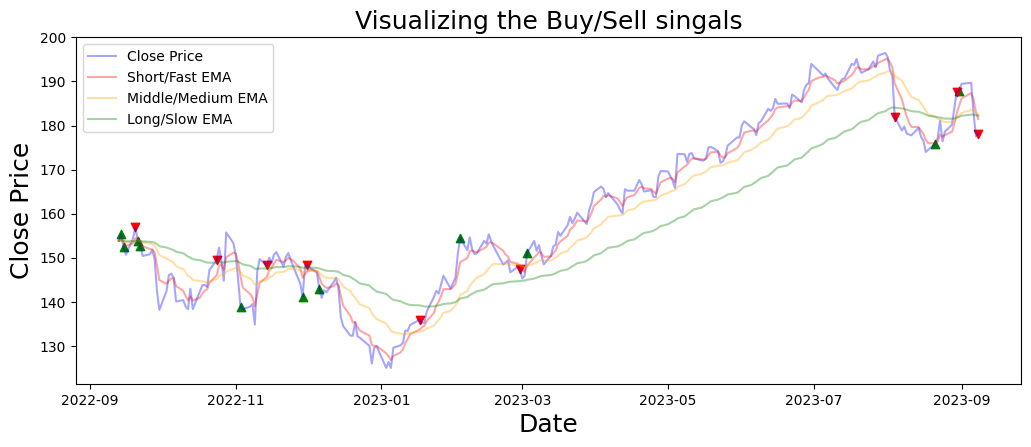

In [28]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Visualizing the Buy/Sell singals', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(df['Short'], label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(df['Middle'], label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(df['Long'], label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

Setting the target for the dependent variable (y) 

In [31]:
df['Signal'] = 0
#When the actual returns are greater than or equal 0,generate to buy signal
df.loc[(df['Actual_Returns'] >= 0),'Signal'] = 1
df.loc[(df['Actual_Returns'] < 0),'Signal'] = 0
df.head()

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell,Signal
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN,0
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN,1
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN,0
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN,0
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN,1


In [33]:
df['Strategy_Returns'] = df['Actual_Returns']*df['Signal'].shift()
df

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell,Signal,Strategy_Returns
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN,0,NaN
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN,1,0.000000
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN,0,-0.018930
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN,0,-0.000000
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN,1,0.000000
...,...,...,...,...,...,...,...,...,...
2023-09-01,189.460007,0.008463,186.168330,182.863099,182.226592,NaN,NaN,1,0.008463
2023-09-05,189.699997,0.001267,187.345552,183.484635,182.460136,NaN,NaN,1,0.001267
2023-09-06,182.910004,-0.035793,185.867036,183.432396,182.474195,NaN,NaN,0,-0.035793
2023-09-07,177.559998,-0.029249,183.098023,182.898541,182.320626,NaN,NaN,0,-0.000000


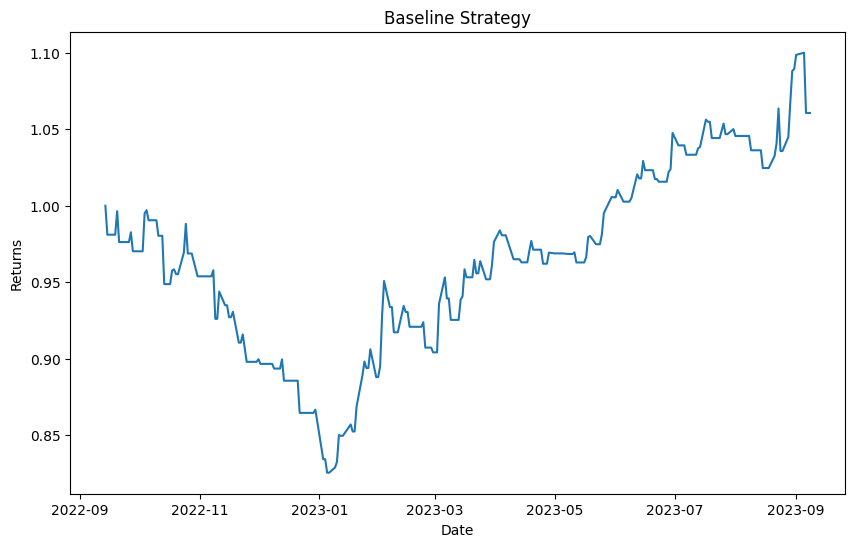

In [39]:
cumulative_returns = (1 + df['Strategy_Returns']).cumprod()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, cumulative_returns)
ax.set_title('Baseline Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
plt.show()